In [1]:
import numpy as np 
import pandas as pd 
!pip install category_encoders

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-shop-data-set/Customer-Churn-Prediction.csv


In [2]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

In [3]:
path = '/kaggle/input/customer-shop-data-set/Customer-Churn-Prediction.csv'
df = pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
column = df.columns
y = df['Churn']

**Check Single column and there relation**

In [5]:
x = df[['tenure']]
# encoder = ce.BinaryEncoder(cols=['gender'])
# x = encoder.fit_transform(x)
x.head()
# x.count()

,tenure
0,1
1,34
2,2
3,45
4,2


In [6]:
# # plt.scatter(x, y)
# sns.countplot(x=x, hue='Churn', data=pd.concat([x, y], axis=1)) 
# plt.title('Churn vs Gender')
# plt.xlabel('Gender (Encoded)')
# plt.ylabel('Count')
# plt.show()

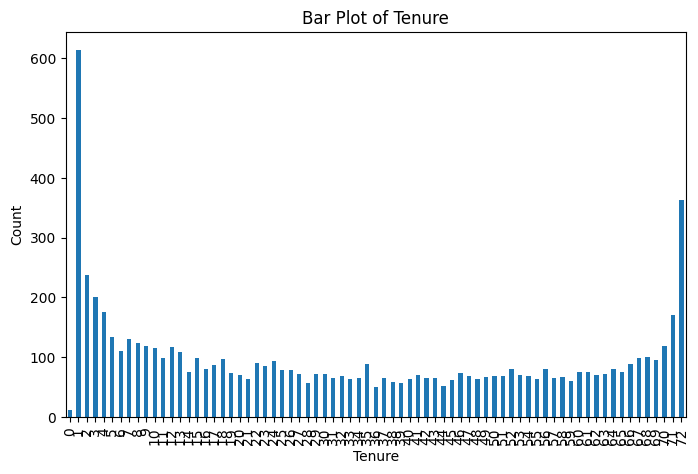

In [22]:
# plt.figure(figsize=(8, 5))
# sns.histplot(df['tenure'], bins=10, kde=True)
# plt.title('Distribution of Tenure')
# plt.xlabel('Tenure')
# plt.ylabel('Frequency')
# plt.show()

plt.figure(figsize=(8, 5))
df['tenure'].value_counts().sort_index().plot(kind='bar')
plt.title('Bar Plot of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()



In [8]:
model = LogisticRegression()
model.fit(x,y)
model.score(x,y)

0.7330682947607554

# Combine the model

In [17]:
# df = df.drop(columns=['customerID','Churn'])
column = ['gender','tenure']
new_df = pd.DataFrame()
for col in column:
#     print(df[col].dtype," = ",np.number)
#     if pd.api.types.is_numeric_dtype(df[col]):
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        new_df = pd.concat([new_df,df[col]],axis=1)
    else:
        encoder = ce.BinaryEncoder(cols=[col])
        x = encoder.fit_transform(df[col])
        new_df = pd.concat([new_df, x], axis=1)
#         one_hot_encoded = pd.get_dummies(df[col], prefix=col)
#         new_df = pd.concat([new_df, one_hot_encoded], axis=1)
#     print(new_df.head())
# new_df = new_df.drop(columns=['gender_1'])
# new_df['tenure_1'] = new_df['tenure']*2
new_df.head()

,gender_0,gender_1,tenure
0,0,1,1
1,1,0,34
2,1,0,2
3,1,0,45
4,0,1,2


In [18]:
new_df['tenure_1'] = np.sqrt(new_df['tenure'])

new_df.head()
# for index, row in new_df.iterrows():
#     print(f"Index: {index}")
#     print(row)  # Each row is a pandas Series

# output = -0.67963989-0.35790235* new_df['gender_0']-0.31885285*new_df['gender_1']

,gender_0,gender_1,tenure,tenure_1
0,0,1,1,1.000000
1,1,0,34,5.830952
2,1,0,2,1.414214
3,1,0,45,6.708204
4,0,1,2,1.414214


In [19]:
model.fit(new_df,y)
model.score(new_df,y)
# print(model.coef_)
# print(model.intercept_)

0.7549339769984381